In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import random
import pandas as pd

In [3]:
real = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/OriginalInputFiles/True.csv')
fake = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/OriginalInputFiles/Fake.csv')
smallDataset = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/OriginalInputFiles/news.csv')

In [4]:
real

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"
...,...,...,...,...
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017"
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017"
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017"
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017"


In [5]:
fake

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"
...,...,...,...,...
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016"
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016"
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016"
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016"


In [6]:
real['label']=1
fake['label']=0

cleaningDF = pd.concat([real, fake], ignore_index= True)

In [7]:
cleaningDF

,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1
...,...,...,...,...,...
44893,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",0
44894,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",0
44895,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",0
44896,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",0


In [8]:
smallDataset = smallDataset.drop(['Unnamed: 0'], axis=1)

encodeStatusLabels = {'FAKE' : 0, 'REAL' : 1}

smallDataset = smallDataset[smallDataset["text"].str.len() >= 5]

smallDataset['label'] = smallDataset['label'].map(encodeStatusLabels)

In [9]:
smallDataset

,title,text,label
0,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",0
1,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,0
2,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,1
3,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",0
4,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,1
...,...,...,...
6330,State Department says it can't find emails fro...,The State Department told the Republican Natio...,1
6331,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,0
6332,Anti-Trump Protesters Are Tools of the Oligarc...,Anti-Trump Protesters Are Tools of the Oligar...,0
6333,"In Ethiopia, Obama seeks progress on peace, se...","ADDIS ABABA, Ethiopia —President Obama convene...",1


In [10]:
smallDataset.isna().sum()

title    0
text     0
label    0
dtype: int64

In [11]:
cleaningDF.isna().sum()

title      0
text       0
subject    0
date       0
label      0
dtype: int64

In [12]:
cleaningDF = cleaningDF.drop(['subject', 'date'], axis=1)

In [13]:
def removeLocationAndName(strVal):
    splitArr = strVal.split("(Reuters) ")
    if(len(splitArr) > 1):
        return splitArr[1]
    return splitArr[0]

In [14]:
import re
cleaningDF['textCleaned']= cleaningDF['text'].map(lambda x : removeLocationAndName(x))
cleaningDF['textCleaned']= cleaningDF['textCleaned'].map(lambda x: re.sub('[^A-Za-z0-9]+', ' ', x))
cleaningDF['textCleaned']= cleaningDF['textCleaned'].map(lambda x: x.strip())
cleaningDF['textCleaned']= cleaningDF['textCleaned'].map(lambda x: re.sub(' +', ' ',x))
cleaningDF['textCleaned']= cleaningDF['textCleaned'].map(lambda x: x.lower())
cleaningDF['titleCleaned']= cleaningDF['title'].map(lambda x: re.sub('[^A-Za-z0-9]+', ' ', x))
cleaningDF['titleCleaned']= cleaningDF['titleCleaned'].map(lambda x: x.strip())
cleaningDF['titleCleaned']= cleaningDF['titleCleaned'].map(lambda x: re.sub(' +', ' ',x))
cleaningDF['titleCleaned']= cleaningDF['titleCleaned'].map(lambda x: x.lower())

In [15]:
smallDataset['textCleaned']= smallDataset['text'].map(lambda x : removeLocationAndName(x))
smallDataset['textCleaned']= smallDataset['textCleaned'].map(lambda x: re.sub('[^A-Za-z0-9]+', ' ', x))
smallDataset['textCleaned']= smallDataset['textCleaned'].map(lambda x: x.strip())
smallDataset['textCleaned']= smallDataset['textCleaned'].map(lambda x: re.sub(' +', ' ',x))
smallDataset['textCleaned']= smallDataset['textCleaned'].map(lambda x: x.lower())
smallDataset['titleCleaned']= smallDataset['title'].map(lambda x: re.sub('[^A-Za-z0-9]+', ' ', x))
smallDataset['titleCleaned']= smallDataset['titleCleaned'].map(lambda x: x.strip())
smallDataset['titleCleaned']= smallDataset['titleCleaned'].map(lambda x: re.sub(' +', ' ',x))
smallDataset['titleCleaned']= smallDataset['titleCleaned'].map(lambda x: x.lower())

In [16]:
cleaningDF

,title,text,label,textCleaned,titleCleaned
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,1,the head of a conservative republican faction ...,as u s budget fight looms republicans flip the...
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,1,transgender people will be allowed for the fir...,u s military to accept transgender recruits on...
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,1,the special counsel investigation of links bet...,senior u s republican senator let mr mueller d...
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,1,trump campaign adviser george papadopoulos tol...,fbi russia probe helped by australian diplomat...
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,1,president donald trump called on the u s posta...,trump wants postal service to charge much more...
...,...,...,...,...,...
44893,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,0,21st century wire says as 21wire reported earl...,mcpain john mccain furious that iran treated u...
44894,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,0,21st century wire says it s a familiar theme w...,justice yahoo settles e mail privacy class act...
44895,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,0,patrick henningsen 21st century wireremember w...,sunnistan us and allied safe zone plan to take...
44896,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,0,21st century wire says al jazeera america will...,how to blow 700 million al jazeera america fin...


In [17]:
smallDataset

,title,text,label,textCleaned,titleCleaned
0,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",0,daniel greenfield a shillman journalism fellow...,you can smell hillary s fear
1,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,0,google pinterest digg linkedin reddit stumbleu...,watch the exact moment paul ryan committed pol...
2,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,1,u s secretary of state john f kerry said monda...,kerry to go to paris in gesture of sympathy
3,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",0,kaydee king kaydeeking november 9 2016 the les...,bernie supporters on twitter erupt in anger ag...
4,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,1,it s primary day in new york and front runners...,the battle of new york why this primary matters
...,...,...,...,...,...
6330,State Department says it can't find emails fro...,The State Department told the Republican Natio...,1,the state department told the republican natio...,state department says it can t find emails fro...
6331,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,0,the p in pbs should stand for plutocratic or p...,the p in pbs should stand for plutocratic or p...
6332,Anti-Trump Protesters Are Tools of the Oligarc...,Anti-Trump Protesters Are Tools of the Oligar...,0,anti trump protesters are tools of the oligarc...,anti trump protesters are tools of the oligarc...
6333,"In Ethiopia, Obama seeks progress on peace, se...","ADDIS ABABA, Ethiopia —President Obama convene...",1,addis ababa ethiopia president obama convened ...,in ethiopia obama seeks progress on peace secu...


In [18]:
finalDataFrame = cleaningDF.drop(['title', 'text'], axis=1)
finalSmallDataset = smallDataset.drop(['title', 'text'], axis=1)

In [19]:
renameLabels = {"textCleaned": "text", "titleCleaned": "title"}

In [20]:
finalDataFrame = finalDataFrame.rename(columns = renameLabels)
finalDataFrame

,label,text,title
0,1,the head of a conservative republican faction ...,as u s budget fight looms republicans flip the...
1,1,transgender people will be allowed for the fir...,u s military to accept transgender recruits on...
2,1,the special counsel investigation of links bet...,senior u s republican senator let mr mueller d...
3,1,trump campaign adviser george papadopoulos tol...,fbi russia probe helped by australian diplomat...
4,1,president donald trump called on the u s posta...,trump wants postal service to charge much more...
...,...,...,...
44893,0,21st century wire says as 21wire reported earl...,mcpain john mccain furious that iran treated u...
44894,0,21st century wire says it s a familiar theme w...,justice yahoo settles e mail privacy class act...
44895,0,patrick henningsen 21st century wireremember w...,sunnistan us and allied safe zone plan to take...
44896,0,21st century wire says al jazeera america will...,how to blow 700 million al jazeera america fin...


In [21]:
finalSmallDataset = finalSmallDataset.rename(columns = renameLabels)
finalSmallDataset

,label,text,title
0,0,daniel greenfield a shillman journalism fellow...,you can smell hillary s fear
1,0,google pinterest digg linkedin reddit stumbleu...,watch the exact moment paul ryan committed pol...
2,1,u s secretary of state john f kerry said monda...,kerry to go to paris in gesture of sympathy
3,0,kaydee king kaydeeking november 9 2016 the les...,bernie supporters on twitter erupt in anger ag...
4,1,it s primary day in new york and front runners...,the battle of new york why this primary matters
...,...,...,...
6330,1,the state department told the republican natio...,state department says it can t find emails fro...
6331,0,the p in pbs should stand for plutocratic or p...,the p in pbs should stand for plutocratic or p...
6332,0,anti trump protesters are tools of the oligarc...,anti trump protesters are tools of the oligarc...
6333,1,addis ababa ethiopia president obama convened ...,in ethiopia obama seeks progress on peace secu...


In [22]:
trainingDataset = pd.concat([finalDataFrame, finalSmallDataset], ignore_index= True)

In [23]:
trainingDataset.to_csv('/content/drive/MyDrive/Colab Notebooks/OutputFiles/TrainNews.csv', index=False)

In [24]:
trainingDataset

,label,text,title
0,1,the head of a conservative republican faction ...,as u s budget fight looms republicans flip the...
1,1,transgender people will be allowed for the fir...,u s military to accept transgender recruits on...
2,1,the special counsel investigation of links bet...,senior u s republican senator let mr mueller d...
3,1,trump campaign adviser george papadopoulos tol...,fbi russia probe helped by australian diplomat...
4,1,president donald trump called on the u s posta...,trump wants postal service to charge much more...
...,...,...,...
51192,1,the state department told the republican natio...,state department says it can t find emails fro...
51193,0,the p in pbs should stand for plutocratic or p...,the p in pbs should stand for plutocratic or p...
51194,0,anti trump protesters are tools of the oligarc...,anti trump protesters are tools of the oligarc...
51195,1,addis ababa ethiopia president obama convened ...,in ethiopia obama seeks progress on peace secu...


In [25]:
df=trainingDataset.copy()


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'length')

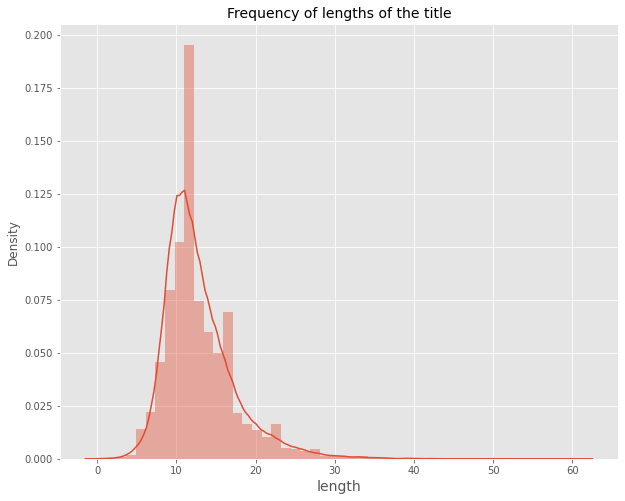

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("ggplot")
plt.figure(figsize=(10, 8))
df['length_title'] = df['title'].apply(lambda x: len(x.split()))
sns.distplot(df['length_title'])
plt.title('Frequency of lengths of the title', fontsize=14)
plt.xlabel('length', fontsize=14)



/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


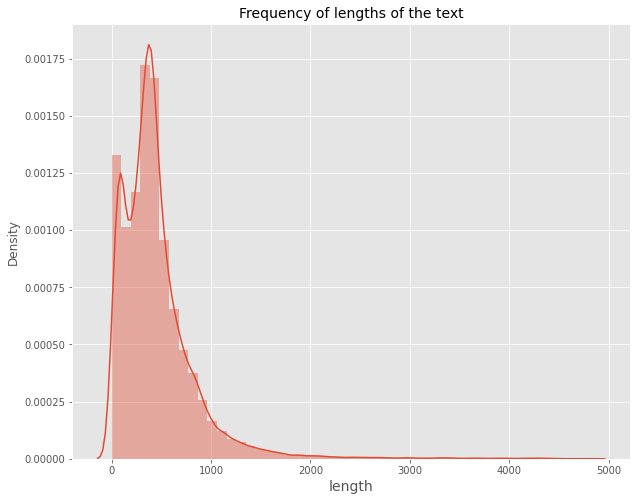

In [27]:
plt.style.use("ggplot")
plt.figure(figsize=(10, 8))
df['length_text'] = df['text'].apply(lambda x: len(x.split()))
sns.distplot(df[df['length_text'] < 5000]['length_text'])
plt.title('Frequency of lengths of the text', fontsize=14)
plt.xlabel('length', fontsize=14)
None

